### 기본 셋팅 

In [29]:
# 데이터 처리
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 문자열 딕셔너리 파싱용
import ast

# 문자열 정리용
import re

# Garbage Collector 모듈 임포트 (더 이상 사용되지 않는 메모리 자동 식별, 해제 _ 메모리 정리용)
import gc

In [16]:
df1 = pd.read_csv("olist_customers_dataset.csv")
df2 =  pd.read_csv("olist_geolocation_dataset.csv")
df3 =  pd.read_csv("olist_order_items_dataset.csv")
df4 =  pd.read_csv("olist_order_payments_dataset.csv")
df5 =  pd.read_csv("olist_order_reviews_dataset.csv")
df6 =  pd.read_csv("olist_orders_dataset.csv")
df7 =  pd.read_csv("olist_products_dataset.csv")
df8 =  pd.read_csv("olist_sellers_dataset.csv")
df9 =  pd.read_csv("product_category_name_translation.csv")

### df_shape 확인

In [20]:
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [21]:
df2.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [22]:
df3.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [23]:
df4.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [24]:
df5.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [25]:
df6.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017.10.2 10:56,2017.10.2 11:07,2017.10.4 19:55,2017.10.10 21:25,2017.10.18 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018.7.24 20:41,2018.7.26 3:24,2018.7.26 14:31,2018.8.7 15:27,2018.8.13 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018.8.8 8:38,2018.8.8 8:55,2018.8.8 13:50,2018.8.17 18:06,2018.9.4 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017.11.18 19:28,2017.11.18 19:45,2017.11.22 13:39,2017.12.2 0:28,2017.12.15 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018.2.13 21:18,2018.2.13 22:20,2018.2.14 19:46,2018.2.16 18:17,2018.2.26 0:00


In [26]:
df7.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [27]:
df8.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [28]:
df9.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 리뷰 작성 전 문제 감지 EDA

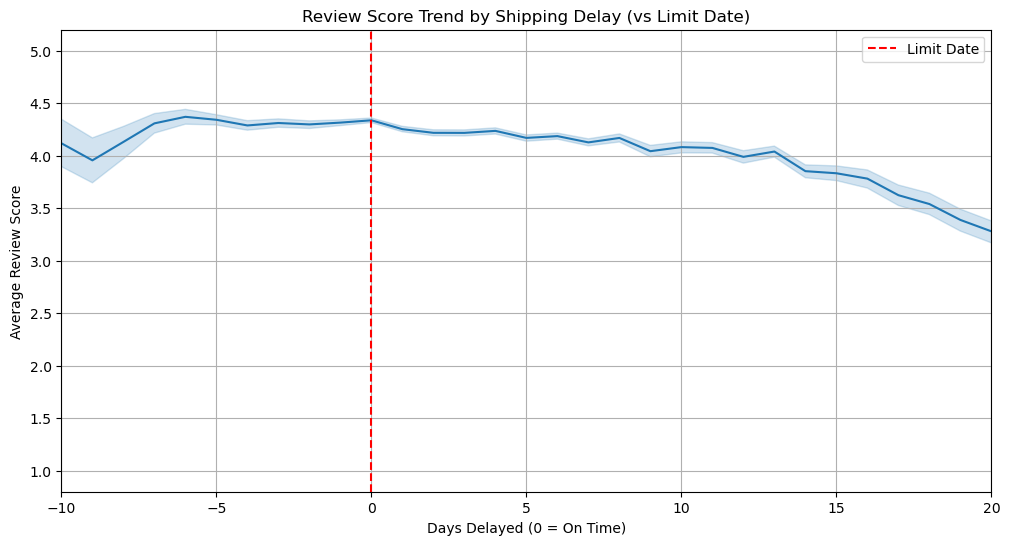

--- 배송 지연 구간별 평균 리뷰 점수 ---
delay_vs_limit
(-inf, 0.0]    4.314801
(0.0, 3.0]     4.231791
(3.0, 7.0]     4.182529
(7.0, inf]     3.625570
Name: review_score, dtype: float64


/var/folders/8g/5y4qk5fd0_b9d8hllgck3lmh0000gn/T/ipykernel_74307/2706495751.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_summary = df.groupby(pd.cut(df['delay_vs_limit'], bins=[-np.inf, 0, 3, 7, np.inf]))['review_score'].mean()


In [31]:

# 1. 데이터 로드 
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')

# 2. 날짜 데이터 형변환 
date_columns = [
    'order_purchase_timestamp', 'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col])

order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

# 3. 데이터 병합 (분석용 통합 데이터프레임 생성)
# 분석 목적: 지연 발생 여부와 실제 리뷰 점수 매칭
df = pd.merge(orders, order_items, on='order_id')
df = pd.merge(df, order_reviews[['order_id', 'review_score']], on='order_id')

# 4. 선제적 감지 지표 계산
# (1) 셀러의 발송 지연: 물류사에 넘기기로 한 기한(limit) 대비 실제 발송일
# * 주의: 실시간 감지 모델에서는 '현재 시각' 기준으로 발송 여부를 체크해야 함
df['seller_delay'] = (df['shipping_limit_date'] - datetime.now()).dt.days # 현재 기준 예시

# (2) 고객 입장에서의 지연 (이미 완료된 주문 기준 검증)
# 배송 기한(shipping_limit_date) 대비 실제 배송 완료일의 차이
df['delay_vs_limit'] = (df['order_delivered_customer_date'] - df['shipping_limit_date']).dt.days

# 5. 시각화: "얼마나 늦어야 점수가 깎일까?" (임계점 파악)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='delay_vs_limit', y='review_score')
plt.title('Review Score Trend by Shipping Delay (vs Limit Date)')
plt.xlabel('Days Delayed (0 = On Time)')
plt.ylabel('Average Review Score')
plt.axvline(0, color='red', linestyle='--', label='Limit Date')
plt.xlim(-10, 20) # 주요 변화 구간 집중
plt.grid(True)
plt.legend()
plt.show()

# 6. 객관적 수치 요약
delay_summary = df.groupby(pd.cut(df['delay_vs_limit'], bins=[-np.inf, 0, 3, 7, np.inf]))['review_score'].mean()
print("--- 배송 지연 구간별 평균 리뷰 점수 ---")
print(delay_summary)

In [45]:
# 1. 분석용 통합 데이터에서 카테고리별 주문 건수 계산
cat_counts = df_final.groupby('product_category_name_english').size().reset_index(name='order_count')

# 2. 기준 설정 (예: 100건 이상)
min_order_threshold = 100
filtered_cats = cat_counts[cat_counts['order_count'] >= min_order_threshold].sort_values(by='order_count', ascending=False)

# 3. 결과 출력
print(f"--- 카테고리 압축 결과 ---")
print(f"1. 원본 전체 카테고리(번역본 기준): {len(cat_counts)}개")
print(f"2. {min_order_threshold}건 이상으로 압축된 카테고리: {len(filtered_cats)}개")
print("-" * 30)
print(filtered_cats) # 압축된 카테고리 리스트와 각 주문 건수 출력

--- 카테고리 압축 결과 ---
1. 원본 전체 카테고리(번역본 기준): 71개
2. 100건 이상으로 압축된 카테고리: 53개
------------------------------
              product_category_name_english  order_count
7                            bed_bath_table        11270
43                            health_beauty         9727
65                           sports_leisure         8700
39                          furniture_decor         8415
15                    computers_accessories         7894
49                               housewares         6989
70                            watches_gifts         6001
68                                telephony         4550
42                             garden_tools         4361
5                                      auto         4256
69                                     toys         4125
20                               cool_stuff         3806
59                                perfumery         3435
6                                      baby         3073
26                              electroni

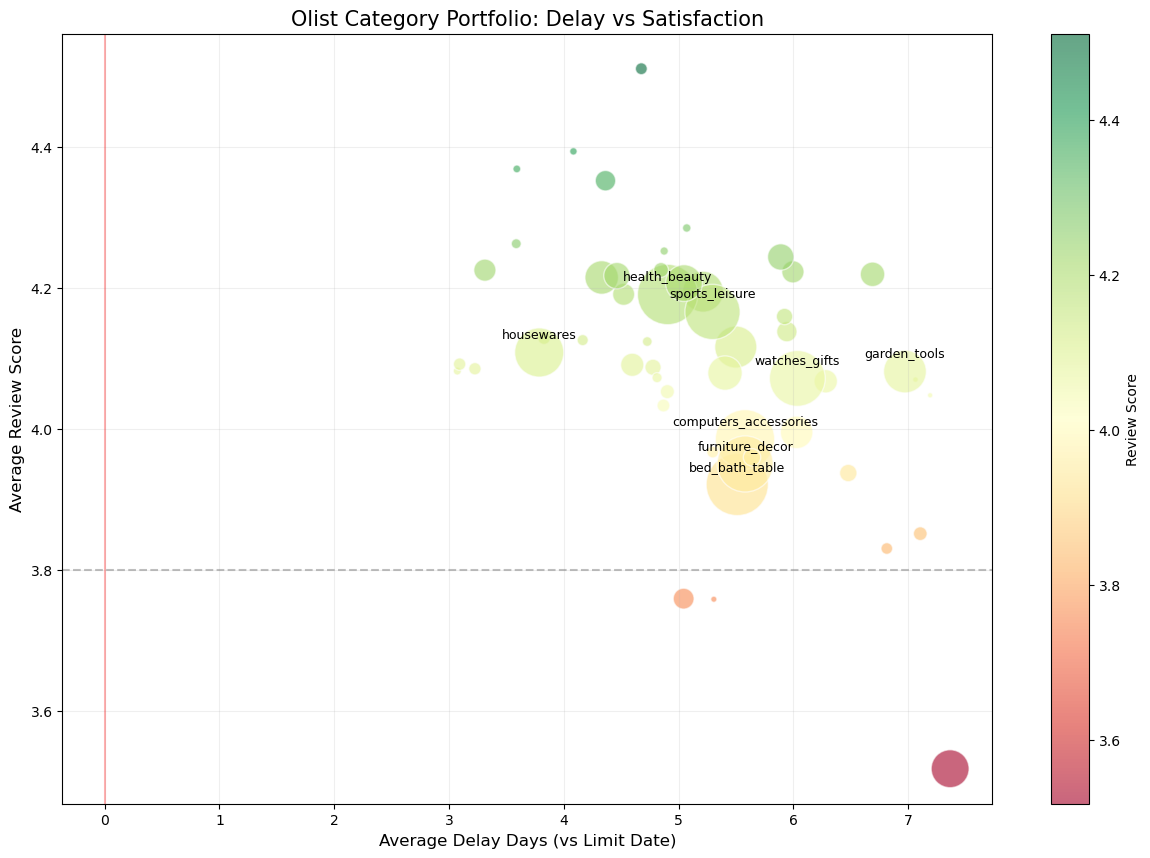

In [39]:


# 1. 모든 데이터 로드 (파일명 확인 필요)
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
trans = pd.read_csv('product_category_name_translation.csv')

# 2. 날짜 데이터 변환
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])

# 3. 데이터 병합 (순차적 조인)
# orders + items (주문-아이템)
m1 = pd.merge(items, orders[['order_id', 'order_delivered_customer_date']], on='order_id', how='left')

# + reviews (리뷰 점수)
m2 = pd.merge(m1, reviews[['order_id', 'review_score']], on='order_id', how='left')

# + payments (매출액)
m3 = pd.merge(m2, payments.groupby('order_id')['payment_value'].sum().reset_index(), on='order_id', how='left')

# + products & translation (카테고리명)
m4 = pd.merge(m3, products[['product_id', 'product_category_name']], on='product_id', how='left')
df_final = pd.merge(m4, trans, on='product_category_name', how='left')

# 4. 분석 지표 계산 (지연 일수)
# 배송 완료된 데이터만 추출하여 지연도 계산
df_analysis = df_final.dropna(subset=['order_delivered_customer_date', 'review_score']).copy()
df_analysis['delay_vs_limit'] = (df_analysis['order_delivered_customer_date'] - df_analysis['shipping_limit_date']).dt.days

# 5. 카테고리별 요약
cat_stats = df_analysis.groupby('product_category_name_english').agg({
    'delay_vs_limit': 'mean',
    'review_score': 'mean',
    'payment_value': 'sum',
    'order_id': 'count'
}).reset_index()

# 데이터 신뢰도를 위해 주문건수 100건 이상인 카테고리만 노출
cat_stats = cat_stats[cat_stats['order_id'] > 100]

# 6. 버블 차트 시각화
plt.figure(figsize=(15, 10))
# 매출 규모에 따른 버블 크기 (너무 커지지 않게 조정)
bubble_size = cat_stats['payment_value'] / cat_stats['payment_value'].max() * 2000 

scatter = plt.scatter(
    cat_stats['delay_vs_limit'], 
    cat_stats['review_score'], 
    s=bubble_size, 
    c=cat_stats['review_score'], 
    cmap='RdYlGn', 
    alpha=0.6, 
    edgecolors='w'
)

# 주요 카테고리 텍스트 라벨링
for i, row in cat_stats.iterrows():
    if row['payment_value'] > cat_stats['payment_value'].quantile(0.85): # 매출 상위 15%만 이름 표시
        plt.text(row['delay_vs_limit'], row['review_score']+0.02, row['product_category_name_english'], fontsize=9, ha='center')

plt.axhline(3.8, color='grey', linestyle='--', alpha=0.5) # 전체 평균 가이드선
plt.axvline(0, color='red', linestyle='-', alpha=0.3) # 지연 시작선
plt.title('Olist Category Portfolio: Delay vs Satisfaction', fontsize=15)
plt.xlabel('Average Delay Days (vs Limit Date)', fontsize=12)
plt.ylabel('Average Review Score', fontsize=12)
plt.colorbar(scatter, label='Review Score')
plt.grid(True, alpha=0.2)
plt.show()

--- 평판 하락 리스크 TOP 3 카테고리 ---
   product_category_name_english  review_score  delay_vs_limit
57              office_furniture      3.517428        7.364784
7                 bed_bath_table      3.920983        5.510150
39               furniture_decor      3.950116        5.579115


/var/folders/8g/5y4qk5fd0_b9d8hllgck3lmh0000gn/T/ipykernel_74307/812435537.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


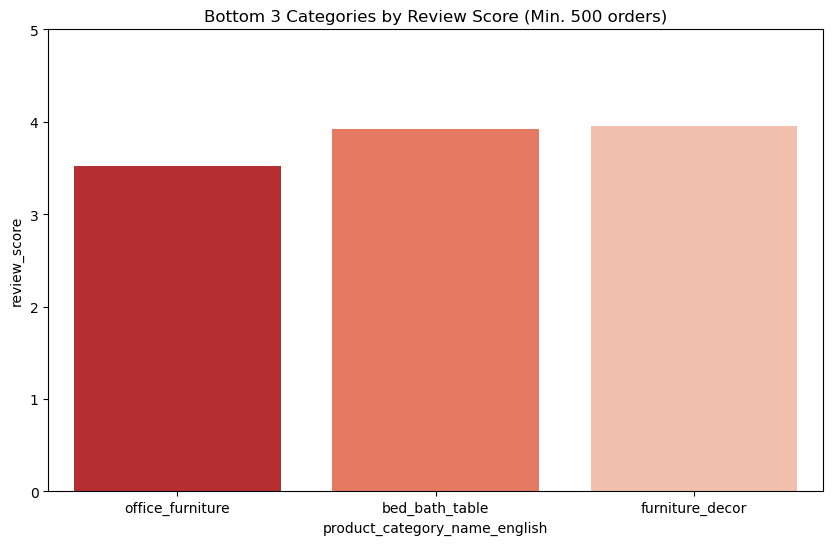

In [42]:
# 1. 하위 3개 카테고리 확정 (평균 리뷰 점수 기준 낮은 순)
# 단, 데이터 신뢰성을 위해 주문 건수 500건 이상인 카테고리 중에서만 선정
reliable_cats = cat_stats[cat_stats['order_id'] >= 500]
bottom_3 = reliable_cats.sort_values(by='review_score').head(3)

print("--- 평판 하락 리스크 TOP 3 카테고리 ---")
print(bottom_3[['product_category_name_english', 'review_score', 'delay_vs_limit']])

# 2. 하위 3개 카테고리만 별도로 시각화 (가독성 극대화)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=bottom_3, 
    x='product_category_name_english', 
    y='review_score', 
    palette='Reds_r'
)
plt.ylim(0, 5)
plt.title('Bottom 3 Categories by Review Score (Min. 500 orders)')
plt.show()

In [50]:
import pandas as pd

# 1. 필수 데이터 로드 (9개 중 핵심 테이블 활용)
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
trans = pd.read_csv('product_category_name_translation.csv')

# 2. 데이터 병합 (컬럼 중복 방지를 위해 필요한 컬럼만 추출)
# 주문 + 아이템 + 리뷰 + 결제액 + 카테고리명
df = pd.merge(items, orders[['order_id', 'order_delivered_customer_date']], on='order_id', how='left')
df = pd.merge(df, reviews[['order_id', 'review_score']], on='order_id', how='left')
df = pd.merge(df, payments.groupby('order_id')['payment_value'].sum().reset_index(), on='order_id', how='left')
df = pd.merge(df, products[['product_id', 'product_category_name']], on='product_id', how='left')
df = pd.merge(df, trans, on='product_category_name', how='left')

# 3. 날짜 변환 및 지연 일수 계산
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['delay'] = (df['order_delivered_customer_date'] - df['shipping_limit_date']).dt.days

# 4. 리뷰 500개 이상인 카테고리 중 하위 3개 선정
cat_stats = df.groupby('product_category_name_english').agg({
    'review_score': 'mean',
    'order_id': 'count'
}).reset_index()

bottom_3_cat_names = cat_stats[cat_stats['order_id'] >= 500].sort_values(by='review_score').head(3)['product_category_name_english'].tolist()

# 5. 각 카테고리별로 '매출은 큰데 점수는 최악인' 셀러 1명씩 추출
worst_sellers_list = []

for cat in bottom_3_cat_names:
    target_df = df[df['product_category_name_english'] == cat]
    
    # 셀러별 집계
    seller_perf = target_df.groupby('seller_id').agg({
        'payment_value': 'sum',
        'review_score': 'mean',
        'delay': 'mean'
    }).reset_index()
    
    # 매출 상위 20% 셀러 중 가장 평점 낮은 1인
    top_revenue_cutoff = seller_perf['payment_value'].quantile(0.8)
    worst_one = seller_perf[seller_perf['payment_value'] >= top_revenue_cutoff].sort_values(by='review_score').head(1)
    worst_one['category_name'] = cat
    worst_sellers_list.append(worst_one)

# 최종 결과 합치기
worst_sellers_final = pd.concat(worst_sellers_list)

print("--- [최종 리포트] 관리 대상 하위 3개 카테고리 및 대표 셀러 ---")
print(worst_sellers_final[['category_name', 'seller_id', 'review_score', 'delay', 'payment_value']])

--- [최종 리포트] 관리 대상 하위 3개 카테고리 및 대표 셀러 ---
        category_name                         seller_id  review_score  \
29   office_furniture  c26a2be5b53b7db6b276280da212a779      2.722222   
82     bed_bath_table  54965bbe3e4f07ae045b90b0b8541f52      2.938272   
200   furniture_decor  8c3b533c63cca56240f94f1e3a6b18ef      1.000000   

         delay  payment_value  
29    5.277778       15616.89  
82   19.567901       15560.61  
200  36.000000        7991.23  


In [53]:
import pandas as pd

# 1. 대상 셀러 ID 리스트
target_seller_ids = [
    'c26a2be5b53b7db6b276280da212a779', 
    '54965bbe3e4f07ae045b90b0b8541f52', 
    '8c3b533c63cca56240f94f1e3a6b18ef'
]

# 2. 안전한 지연 시간(delay) 재계산 
# (기존 컬럼이 없거나 이름이 달라도 날짜 데이터만 있다면 다시 만듭니다)
df_final['order_delivered_customer_date'] = pd.to_datetime(df_final['order_delivered_customer_date'])
df_final['shipping_limit_date'] = pd.to_datetime(df_final['shipping_limit_date'])

# 새로운 컬럼 'delay_check' 생성 (기존 delay 컬럼과 충돌 방지)
df_final['delay_check'] = (df_final['order_delivered_customer_date'] - df_final['shipping_limit_date']).dt.days

# 3. 데이터 추출
# 만약 product_category_name_english가 없다면 포르투갈어 이름이라도 나오게 예외처리
cols_to_show = ['seller_id', 'order_id', 'price', 'shipping_limit_date', 
                'order_delivered_customer_date', 'delay_check', 'review_score']

# English 카테고리명이 있으면 추가
if 'product_category_name_english' in df_final.columns:
    cols_to_show.insert(1, 'product_category_name_english')

detailed_rows = df_final[df_final['seller_id'].isin(target_seller_ids)][cols_to_show]

# 4. 결과 출력 (지연이 큰 순서대로)
pd.set_option('display.max_rows', 500)
print(f"--- [최종 확인] 대상 셀러 3인의 상세 데이터 (총 {len(detailed_rows)}건) ---")
display(detailed_rows.sort_values(by='delay_check', ascending=False))

--- [최종 확인] 대상 셀러 3인의 상세 데이터 (총 112건) ---


,seller_id,product_category_name_english,order_id,price,shipping_limit_date,order_delivered_customer_date,delay_check,review_score
89675,54965bbe3e4f07ae045b90b0b8541f52,bed_bath_table,ca759ab8f22c84329b8dbcb5192ef923,159.90,2017-11-30 16:16:01,2018-02-16 17:58:00,78.0,1.0
32338,54965bbe3e4f07ae045b90b0b8541f52,bed_bath_table,48cefe210d7a04f470fd6592ea91ffb9,159.90,2017-11-30 13:31:16,2018-01-31 18:24:00,62.0,1.0
38643,54965bbe3e4f07ae045b90b0b8541f52,bed_bath_table,5738b1361143b2ba3e59fcb5dffc7114,139.90,2017-12-01 17:20:03,2018-01-30 18:32:00,60.0,1.0
3795,54965bbe3e4f07ae045b90b0b8541f52,bed_bath_table,08904f6557108c451821501ca9e6aa4a,79.90,2017-11-30 17:31:36,2018-01-24 16:25:00,54.0,1.0
112005,54965bbe3e4f07ae045b90b0b8541f52,bed_bath_table,fcf77320278b491829c6e5d767a3f20d,279.90,2017-11-30 02:16:04,2018-01-23 23:13:00,54.0,1.0
69258,54965bbe3e4f07ae045b90b0b8541f52,bed_bath_table,9d3c48c87bfb7e8b574b4d375f882841,159.90,2017-11-30 00:31:31,2018-01-23 22:36:00,54.0,1.0
96221,54965bbe3e4f07ae045b90b0b8541f52,bed_bath_table,d8f4ac2b5cf577657a2165a7c75857ff,119.90,2017-12-01 11:15:03,2018-01-22 13:56:00,52.0,1.0
84553,54965bbe3e4f07ae045b90b0b8541f52,bed_bath_table,beed527292a9e9a0e10bc602565b510c,374.90,2017-11-30 02:54:30,2018-01-21 16:58:00,52.0,3.0
13173,54965bbe3e4f07ae045b90b0b8541f52,bed_bath_table,1db522d84fad144624204d532f5277f4,79.90,2017-11-30 02:38:27,2018-01-19 18:33:00,50.0,NaN
20384,54965bbe3e4f07ae045b90b0b8541f52,bed_bath_table,2e6d9b2e86ecc0efd34ab46632ef4448,79.90,2017-12-01 14:18:35,2018-01-19 20:11:00,49.0,1.0


In [58]:
import pandas as pd

# 1. 대상 셀러 ID 리스트
target_seller_ids = [
    'c26a2be5b53b7db6b276280da212a779', 
    '54965bbe3e4f07ae045b90b0b8541f52', 
    '8c3b533c63cca56240f94f1e3a6b18ef'
]

# 2. 리뷰 텍스트 데이터 병합 (텍스트 누락 방지)
# 기존 df_final에 리뷰 메시지가 없다면 reviews 데이터셋에서 다시 가져옵니다.
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_with_text = pd.merge(df_final, reviews[['order_id', 'review_comment_message']], on='order_id', how='left')

# 3. 날짜 및 지연 시간 재계산 (안전장치)
df_with_text['order_delivered_customer_date'] = pd.to_datetime(df_with_text['order_delivered_customer_date'])
df_with_text['shipping_limit_date'] = pd.to_datetime(df_with_text['shipping_limit_date'])
df_with_text['delay_days'] = (df_with_text['order_delivered_customer_date'] - df_with_text['shipping_limit_date']).dt.days

# 4. 판매자별로 데이터를 분리하여 출력
pd.set_option('display.max_colwidth', 100) # 리뷰 내용이 잘리지 않게 설정

for s_id in target_seller_ids:
    seller_data = df_with_text[df_with_text['seller_id'] == s_id].copy()
    
    # 해당 판매자의 요약 정보
    avg_score = seller_data['review_score'].mean()
    avg_delay = seller_data['delay_days'].mean()
    
    print(f"\n{'='*80}")
    print(f"SALLER ID: {s_id}")
    print(f"평균 평점: {avg_score:.2f} | 평균 지연: {avg_delay:.1f}일")
    print(f"{'='*80}")
    
    # 상세 행 출력 (주요 정보 + 리뷰 텍스트)
    display_cols = ['order_id', 'delay_days', 'review_score', 'review_comment_message']
    # 카테고리 컬럼이 있다면 추가
    if 'product_category_name_english' in seller_data.columns:
        display_cols.insert(1, 'product_category_name_english')
        
    display(seller_data[display_cols].sort_values(by='delay_days', ascending=False)) 
    # 너무 많을 수 있어 판매자별 지연 심한 순 상위 10개만 먼저 보여줍니다.


SALLER ID: c26a2be5b53b7db6b276280da212a779
평균 평점: 2.72 | 평균 지연: 5.3일


,order_id,product_category_name_english,delay_days,review_score,review_comment_message
33076,4989085cad96697e77c016d0e856b166,office_furniture,19.0,5.0,LDOCKCIFJFJRH FJFJHRY MBKDIEOEP
10413,17762ff601f1e45ce03106e45acc1ea0,office_furniture,18.0,5.0,NaN
28096,3ea45d5f974b611d993c786591f2c6c5,office_furniture,11.0,5.0,NaN
34062,4bae63148c0e5ba0afb03cace07f580b,office_furniture,11.0,5.0,NaN
53674,77e1d11cc4954b7a395f9ecba7edd397,office_furniture,8.0,1.0,NaN
53675,77e1d11cc4954b7a395f9ecba7edd397,office_furniture,8.0,1.0,NaN
105166,ea9c6e10bc27bfe0cf86e4cda482979a,office_furniture,8.0,4.0,NaN
57156,7f8df73aeab603648dec28a5f6cfadc3,office_furniture,4.0,1.0,"Comprei 4 cofres e só recebi 2.\r\nPor favor, o que fazer para resolver este problema?"
57157,7f8df73aeab603648dec28a5f6cfadc3,office_furniture,4.0,1.0,"Comprei 4 cofres e só recebi 2.\r\nPor favor, o que fazer para resolver este problema?"
57158,7f8df73aeab603648dec28a5f6cfadc3,office_furniture,4.0,1.0,"Comprei 4 cofres e só recebi 2.\r\nPor favor, o que fazer para resolver este problema?"



SALLER ID: 54965bbe3e4f07ae045b90b0b8541f52
평균 평점: 2.94 | 평균 지연: 19.6일


,order_id,product_category_name_english,delay_days,review_score,review_comment_message
90755,ca759ab8f22c84329b8dbcb5192ef923,bed_bath_table,78.0,1.0,NaN
32762,48cefe210d7a04f470fd6592ea91ffb9,bed_bath_table,62.0,1.0,"Comprei e não levei, comprei em novembro com promessa de receber o produto em 12 dias, ja se pas..."
39119,5738b1361143b2ba3e59fcb5dffc7114,bed_bath_table,60.0,1.0,Fiz a compra para recebimento do até dia 20/12 e até o momento não o recebi e não há prazo para ...
70108,9d3c48c87bfb7e8b574b4d375f882841,bed_bath_table,54.0,1.0,"O produto tem um preço legal, mas não entregaram. Portanto não tem como avaliar além disto"
3841,08904f6557108c451821501ca9e6aa4a,bed_bath_table,54.0,1.0,Não recebi meu produto até hj. E não recebi nenhuma satisfação.
113333,fcf77320278b491829c6e5d767a3f20d,bed_bath_table,54.0,1.0,"O produto demorou cerca de dois meses para chegar. Além disso, o produto não contém as medidas d..."
85571,beed527292a9e9a0e10bc602565b510c,bed_bath_table,52.0,3.0,Gostaria de receber o produto antes do ano novo se posivel
97373,d8f4ac2b5cf577657a2165a7c75857ff,bed_bath_table,52.0,1.0,Gostaria de saber quando vai chegar meu produto?
13337,1db522d84fad144624204d532f5277f4,bed_bath_table,50.0,NaN,NaN
20656,2e6d9b2e86ecc0efd34ab46632ef4448,bed_bath_table,49.0,1.0,NaN



SALLER ID: 8c3b533c63cca56240f94f1e3a6b18ef
평균 평점: 1.33 | 평균 지연: 31.0일


,order_id,product_category_name_english,delay_days,review_score,review_comment_message
74429,a6a5d5673d42186a8b8b94ad29b59897,furniture_decor,45.0,1.0,"Sempre compro no lannister.com, porém dessa vez tive uma experiência ruim, já passou o prazo de ..."
74430,a6a5d5673d42186a8b8b94ad29b59897,furniture_decor,45.0,1.0,"Sempre compro no lannister.com, porém dessa vez tive uma experiência ruim, já passou o prazo de ..."
100816,e0bacd42e5f8077488c0a9f4dcfe66da,furniture_decor,27.0,NaN,NaN
100817,e0bacd42e5f8077488c0a9f4dcfe66da,furniture_decor,27.0,NaN,NaN
57492,804f733828d8587c734a1d8fc5634e06,garden_tools,11.0,3.0,NaN
19891,2cc53a4aa9a5a0f2c0ff6559260fb1d4,furniture_decor,NaN,1.0,"Após 45 dias da compra, o produto não foi entregue e não consigo informações sobre o motivo do a..."
19892,2cc53a4aa9a5a0f2c0ff6559260fb1d4,furniture_decor,NaN,1.0,"Após 45 dias da compra, o produto não foi entregue e não consigo informações sobre o motivo do a..."
107048,eee22e7ae5b24692de4cd3c784db660a,furniture_decor,NaN,1.0,A compra foi realizada 2 x e nenhuma delas o produto foi entregue no prazo por falta de estoque....


In [57]:
# 1. 부정 키워드 정의
negative_keywords = ['atraso', 'ruim', 'pessimo', 'nao recebi', 'defeito', 'errado']

# 2. 하위 3인 셀러 데이터 중 1~2점짜리 리뷰만 필터링
worst_reviews = df_with_text[
    (df_with_text['seller_id'].isin(target_seller_ids)) & 
    (df_with_text['review_score'] <= 5)
].copy()

# 3. 텍스트 내 키워드 포함 여부 체크 (소문자 변환 후 검색)
worst_reviews['is_negative'] = worst_reviews['review_comment_message'].str.lower().apply(
    lambda x: any(word in str(x) for word in negative_keywords)
)

# 4. 결과 출력 (부정 키워드가 감지된 행만)
print("--- [집중 분석] 키워드로 걸러낸 실제 부정 리뷰 샘플 ---")
display(worst_reviews[worst_reviews['is_negative'] == True][['seller_id', 'review_score', 'delay_days', 'review_comment_message']])

--- [집중 분석] 키워드로 걸러낸 실제 부정 리뷰 샘플 ---


,seller_id,review_score,delay_days,review_comment_message
19891,8c3b533c63cca56240f94f1e3a6b18ef,1.0,NaN,"Após 45 dias da compra, o produto não foi entregue e não consigo informações sobre o motivo do a..."
19892,8c3b533c63cca56240f94f1e3a6b18ef,1.0,NaN,"Após 45 dias da compra, o produto não foi entregue e não consigo informações sobre o motivo do a..."
23036,c26a2be5b53b7db6b276280da212a779,1.0,0.0,Recebi o produto no prazo mas solicitei o cancelamento pois a mercadoria veio com defeito.
36532,54965bbe3e4f07ae045b90b0b8541f52,1.0,16.0,"Atraso na entrega,e não se consegue um CTT com a empresa"
51048,54965bbe3e4f07ae045b90b0b8541f52,1.0,10.0,"Comprei um tapete marrom redondo recebi um azul retangular, produto de boa qualidade porém errado"
74429,8c3b533c63cca56240f94f1e3a6b18ef,1.0,45.0,"Sempre compro no lannister.com, porém dessa vez tive uma experiência ruim, já passou o prazo de ..."
74430,8c3b533c63cca56240f94f1e3a6b18ef,1.0,45.0,"Sempre compro no lannister.com, porém dessa vez tive uma experiência ruim, já passou o prazo de ..."
80449,54965bbe3e4f07ae045b90b0b8541f52,1.0,13.0,"Produto errado,cor e tamanho errado, péssima qualidade."


In [60]:
import pandas as pd

# 1. 셀러 및 제품 정보 로드
sellers = pd.read_csv('olist_sellers_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

# 2. 날짜 형식 강제 변환 및 지연(delay_new) 실시간 계산
df_final['order_delivered_customer_date'] = pd.to_datetime(df_final['order_delivered_customer_date'])
df_final['shipping_limit_date'] = pd.to_datetime(df_final['shipping_limit_date'])

# 컬럼이 없으면 새로 만듭니다.
df_final['delay_new'] = (df_final['order_delivered_customer_date'] - df_final['shipping_limit_date']).dt.days

# 3. 분석용 데이터 병합 (지역 및 무게 정보 추가)
df_analysis = pd.merge(df_final, sellers[['seller_id', 'seller_state']], on='seller_id', how='left')
df_analysis = pd.merge(df_analysis, products[['product_id', 'product_weight_g']], on='product_id', how='left')

# 4. 판별 분석: 판매자 개인 문제인가, 특정 조건(지역/무게) 문제인가?
# [조건 1] 특정 지역(State)이 배송 지연의 주범인가?
state_perf = df_analysis.groupby('seller_state').agg({
    'delay_new': 'mean',
    'review_score': 'mean',
    'order_id': 'count'
}).rename(columns={'delay_new': 'avg_delay'}).sort_values(by='avg_delay', ascending=False)

# [조건 2] 하위 3인 셀러의 성적이 그 지역 평균보다 나쁜가? (개인 역량 판별)
target_ids = ['c26a2be5b53b7db6b276280da212a779', '54965bbe3e4f07ae045b90b0b8541f52', '8c3b533c63cca56240f94f1e3a6b18ef']
target_perf = df_analysis[df_analysis['seller_id'].isin(target_ids)].groupby(['seller_id', 'seller_state']).agg({
    'delay_new': 'mean

SyntaxError: unterminated string literal (detected at line 29) (3351455044.py, line 29)